In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
general = pd.read_csv('test/general.csv')
prenatal = pd.read_csv('test/prenatal.csv')
sports = pd.read_csv('test/sports.csv')

pd.set_option('display.max_columns', 8)

In [3]:
prenatal.columns = general.columns
sports.columns = general.columns

In [4]:
combined_data = pd.concat([general, prenatal, sports], ignore_index=True).iloc[:, 1:]

combined_data.dropna(inplace=True, how='all')

combined_data.gender = combined_data.gender.apply(lambda x: 'm' if x in ['male', 'man'] else x)
combined_data.gender = combined_data.gender.apply(lambda x: 'f' if x in ['female', 'woman'] else x)
combined_data.loc[combined_data.hospital == 'prenatal', 'gender'] = 'f'

for column in ['bmi', 'diagnosis', 'blood_test', 'ecg', 'ultrasound', 'mri', 'xray', 'children', 'months']:
    combined_data.loc[combined_data[column].isnull(), column] = 0 

1. Which hospital has the highest number of patients?

In [5]:
combined_data.groupby('hospital').size().nlargest(1)


hospital
general    461
dtype: int64

2. What share of the patients in the general hospital suffers from stomach-related issues? Round the result to the third decimal place.

In [6]:
general_patients = combined_data.loc[combined_data['hospital'] == 'general']

(general_patients.groupby('diagnosis').size() / general_patients.shape[0])['stomach'].round(3)

0.325

3. What share of the patients in the sports hospital suffers from dislocation-related issues? Round the result to the third decimal place.

In [7]:
sports_patients = combined_data.loc[combined_data['hospital'] == 'sports']

(sports_patients.groupby('diagnosis').size() / sports_patients.shape[0])['dislocation'].round(3)

0.285

4. What is the difference in the median ages of the patients in the general and sports hospitals?

In [8]:
general_patients.age.median() - sports_patients.age.median()

19.0

5. After data processing at the previous stages, the blood_test column has three values: t= a blood test was taken, f= a blood test wasn't taken, and 0= there is no information. In which hospital the blood test was taken the most often (there is the biggest number of t in the blood_test column among all the hospitals)? How many blood tests were taken?

In [9]:
combined_data.groupby(['hospital', 'blood_test']).size()

hospital  blood_test
general   0              72
          f             206
          t             183
prenatal  t             325
sports    0             214
dtype: int64

1. What is the most common age of a patient among all hospitals? Plot a histogram and choose one of the following age ranges: 0-15, 15-35, 35-55, 55-70, or 70-80

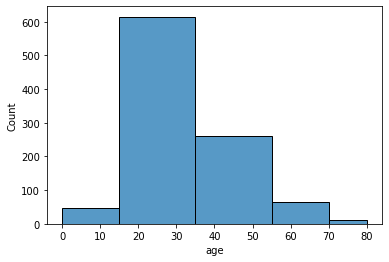

In [10]:
fig1, ax1 = plt.subplots()

sns.histplot(x='age', data=combined_data, ax=ax1, bins=[0, 15, 35, 55, 70, 80])
plt.show()

2. What is the most common diagnosis among patients in all hospitals? Create a pie chart

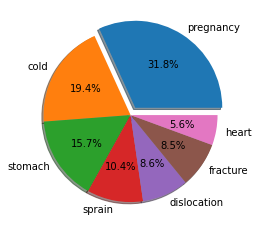

In [11]:
diagnoses = combined_data.diagnosis.value_counts()/combined_data.shape[0]

fig1, ax1 = plt.subplots()
ax1.pie(diagnoses, labels=diagnoses.index, explode=[.1,0,0,0,0,0,0], shadow=True, autopct='%1.1f%%')
plt.show()

3. Build a violin plot of height distribution by hospitals. Try to answer the questions. What is the main reason for the gap in values? Why there are two peaks, which correspond to the relatively small and big values? No special form is required to answer this question

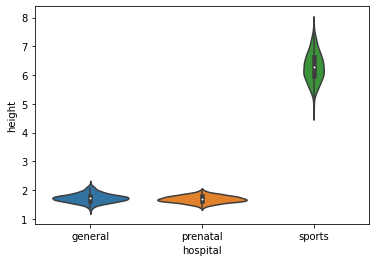

In [12]:
fig1, ax1 = plt.subplots()

sns.violinplot(x='hospital', y='height', data=combined_data, ax=ax1)
plt.show()